## Imports

In [5]:
import torch
from dataset import MyDecDataset, MySegDataset, MyDataLoader
from visualize import show_labeled_image, show_image_and_seg
from utils import xml_to_csv
from model import Model
from torch.utils.data import DataLoader

### Detection Dataset

Size of Detection Dataset: 5
Size of Detection Training Set: 3
Size of Detection Validation Set: 1
Size of Detection Test Set 1


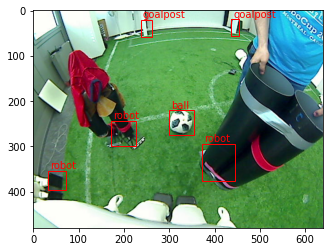

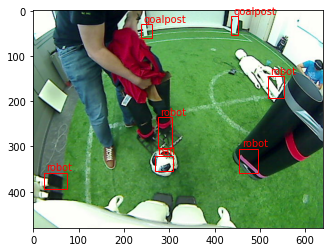

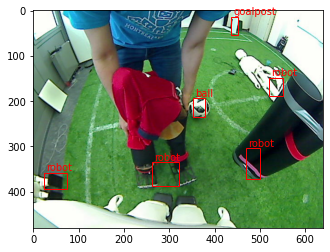

In [2]:
# TODO: Combine all the datasets (dataset-forcetrain-forcetest) -Just working with force test because it is smaller-
# Something to think about in this setup the all transformations will be applied to all of training, validation, and test sets. 

xml_to_csv('./Dataset/blob/forceTest/', 'labels.csv') # This should only be used in the first run then it should be commented out
decDataset = MyDecDataset('labels.csv', image_folder='./Dataset/blob/forceTest/')

# Create train, validation and test sets for detection dataset
print("Size of Detection Dataset:",len(decDataset))
train_dec_dataset, val_dec_dataset, test_dec_dataset = torch.utils.data.random_split(decDataset, [3, 1, 1]) # these should be changed with 70% train, 15% val, 15% test
print("Size of Detection Training Set:",len(train_dec_dataset))
print("Size of Detection Validation Set:",len(val_dec_dataset))
print("Size of Detection Test Set", len(test_dec_dataset))
dec_train_data_loader = MyDataLoader(train_dec_dataset, batch_size=1, shuffle=True)
val_dec_dataset = MyDataLoader(val_dec_dataset, batch_size=1, shuffle=True)
test_dec_dataset = MyDataLoader(test_dec_dataset, batch_size=1, shuffle=True)


# Just as a sanity check display the training set
for images, targets in dec_train_data_loader:
    show_labeled_image(images[0], targets[0]["boxes"], targets[0]["labels"])

### Segmentation Dataset

Size of Segmentation Dataset: 84
Size of Detection Training Set: 60
Size of Detection Validation Set: 20
Size of Detection Test Set 4


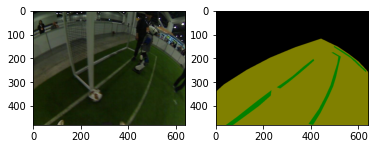

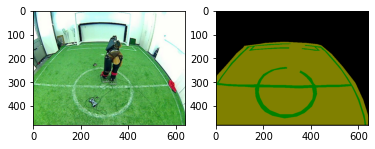

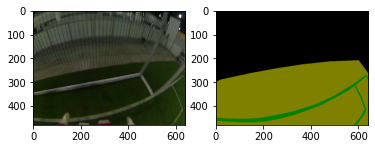

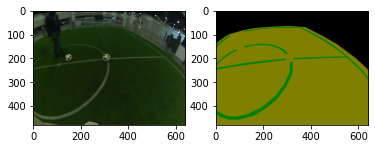

In [3]:
segDataset = MySegDataset('./Dataset/segmentation/forceTrain/')

# Create train, validation and test sets for detection dataset
print("Size of Segmentation Dataset:",len(segDataset))
train_seg_dataset, val_seg_dataset, test_seg_dataset = torch.utils.data.random_split(segDataset, [60, 20, 4]) # these should be changed with 70% train, 15% val, 15% test
print("Size of Detection Training Set:",len(train_seg_dataset))
print("Size of Detection Validation Set:",len(val_seg_dataset))
print("Size of Detection Test Set", len(test_seg_dataset))
train_seg_data_loader = MyDataLoader(train_seg_dataset, batch_size=1, shuffle=True)
val_seg_data_loader = MyDataLoader(val_seg_dataset, batch_size=1, shuffle=True)
test_seg_data_loader = MyDataLoader(test_seg_dataset, batch_size=1, shuffle=True)


# Just as a sanity check display the test set
for images, targets in test_seg_data_loader:
    show_image_and_seg(images[0], targets[0])

### Model

In [8]:
model = Model()
test_seg_data_loader = DataLoader(test_seg_dataset, batch_size=1, shuffle=True) ## Remember to fix the DataLoader (Or it will depend on how we will train)
for _, (images, targets) in enumerate(test_seg_data_loader):
    print(images.shape)
    print(model(images).shape)

torch.Size([1, 3, 480, 640])
torch.Size([1, 3, 240, 320])
torch.Size([1, 3, 480, 640])
torch.Size([1, 3, 240, 320])
torch.Size([1, 3, 480, 640])
torch.Size([1, 3, 240, 320])
torch.Size([1, 3, 480, 640])
torch.Size([1, 3, 240, 320])
